In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

In [303]:
df=pd.read_csv('../btcusdt_1h_zelta.csv')

In [304]:
df.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199
1,2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006
2,2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572
3,2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030
4,2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329


 # Splitting into classes
 we will use 7 classes <br>
 0 when close/open>1.01 <br>
 1 when close/open>1.005 <br>
 2 when 1.005 > close/open >1.0015 <br>
 3 when 1.0015 > close/open > 0.9985 <br>
 4 when 0.9985 > close/open > 0.995 <br>
 5 when 0.995>close/open >0.99 <br>
 6 when close/open <0.99

In [305]:
def return_classes(list):
    open,close=list
    if (close/open)>1.01:
        return 0
    elif (close/open)>1.005:
        return 1
    elif (close/open)>1.0015:
        return 2
    elif (close/open)>0.9985:
        return 3
    elif (close/open)>0.995:
        return 4
    elif (close/open)>0.99:
        return 5
    else:
        return 6

In [306]:
df['class']=df[['open','close']].apply(return_classes,axis=1)

In [307]:
df['class'].value_counts()

class
3    10200
2     7022
4     6810
1     3395
5     3166
0     2343
6     2272
Name: count, dtype: int64

In [308]:
def previous_classes(input_series,previous_count=7):
    output=[np.NaN]*previous_count
    for i in range(previous_count,len(input_series)):
        output.append(list(input_series[i-previous_count:i]))
    return output

In [309]:
df['previous_classes']=previous_classes(df['class'],30)

In [310]:
df=df.dropna()

In [311]:
df.head()

,datetime,open,high,low,close,volume,class,previous_classes
30,2018-01-02 11:30:00,13166.95,13338.66,13041.50,13255.98,722.310035,1,"[6, 6, 1, 1, 0, 4, 0, 6, 5, 1, 4, 6, 4, 6, 0, ..."
31,2018-01-02 12:30:00,13256.07,13359.98,13150.00,13343.00,665.584380,1,"[6, 1, 1, 0, 4, 0, 6, 5, 1, 4, 6, 4, 6, 0, 2, ..."
32,2018-01-02 13:30:00,13343.01,13440.00,13302.59,13326.09,745.643663,3,"[1, 1, 0, 4, 0, 6, 5, 1, 4, 6, 4, 6, 0, 2, 6, ..."
33,2018-01-02 14:30:00,13342.97,13523.46,13326.10,13452.00,511.542770,1,"[1, 0, 4, 0, 6, 5, 1, 4, 6, 4, 6, 0, 2, 6, 3, ..."
34,2018-01-02 15:30:00,13460.00,13617.28,13401.60,13560.00,654.454591,1,"[0, 4, 0, 6, 5, 1, 4, 6, 4, 6, 0, 2, 6, 3, 1, ..."


In [312]:
def compute_counts(classes_list,a,pi):
    for i in classes_list:
        prev=None
        for j in i:
            if prev==None:
                pi[j]+=1
            else:
                a[prev,j]+=1
            prev=j

## Computing transitions probabilities

In [313]:
A0=np.ones((7,7))
pi0=np.ones(7)

A1=np.ones((7,7))
pi1=np.ones(7)

A2=np.ones((7,7))
pi2=np.ones(7)

A3=np.ones((7,7))
pi3=np.ones(7)

A4=np.ones((7,7))
pi4=np.ones(7)

A5=np.ones((7,7))
pi5=np.ones(7)

A6=np.ones((7,7))
pi6=np.ones(7)


compute_counts(df[df['class']==0]['previous_classes'],A0,pi0)
compute_counts(df[df['class']==1]['previous_classes'],A1,pi1)
compute_counts(df[df['class']==2]['previous_classes'],A2,pi2)
compute_counts(df[df['class']==3]['previous_classes'],A3,pi3)
compute_counts(df[df['class']==4]['previous_classes'],A4,pi4)
compute_counts(df[df['class']==5]['previous_classes'],A5,pi5)
compute_counts(df[df['class']==6]['previous_classes'],A6,pi6)

In [314]:
total=len(df)

A0/=A0.sum(axis=1,keepdims=True)
pi0/=pi0.sum()
p0=sum(df['class']==0)/total

A1/=A1.sum(axis=1,keepdims=True)
pi1/=pi1.sum()
p1=sum(df['class']==1)/total

A2/=A2.sum(axis=1,keepdims=True)
pi2/=pi2.sum()
p2=sum(df['class']==2)/total

A3/=A3.sum(axis=1,keepdims=True)
pi3/=pi3.sum()
p3=sum(df['class']==3)/total

A4/=A4.sum(axis=1,keepdims=True)
pi4/=pi4.sum()
p4=sum(df['class']==4)/total

A5/=A5.sum(axis=1,keepdims=True)
pi5/=pi5.sum()
p5=sum(df['class']==5)/total


A6/=A6.sum(axis=1,keepdims=True)
pi6/=pi6.sum()
p6=sum(df['class']==6)/total


log_A0=np.log(A0)
log_pi0=np.log(pi0)
log_p0=np.log(p0)

log_A1=np.log(A1)
log_pi1=np.log(pi1)
log_p1=np.log(p1)

log_A2=np.log(A2)
log_pi2=np.log(pi2)
log_p2=np.log(p2)

log_A3=np.log(A3)
log_pi3=np.log(pi3)
log_p3=np.log(p3)

log_A4=np.log(A4)
log_pi4=np.log(pi4)
log_p4=np.log(p4)

log_A5=np.log(A5)
log_pi5=np.log(pi5)
log_p5=np.log(p5)

log_A6=np.log(A6)
log_pi6=np.log(pi6)
log_p6=np.log(p6)

In [315]:
class Classifier:
  def __init__(self,logAs,logpis,logpriors):
    self.logAs=logAs
    self.logpi=logpis
    self.logpriors=logpriors
    self.k=len(logpriors) #number of classes
  def compute_log_likelihood(self,input_,class_):
    logA=self.logAs[class_]
    logpi=self.logpi[class_]
    prev_class=None
    logprob=0
    for i in input_:
      if prev_class==None:
        logprob+=logpi[i]
      else:
        logprob+=logA[prev_class,i]
      prev_class=i
    return logprob
  def predict(self,inputs):
    predictions=np.zeros(len(inputs))
    for i,input_ in enumerate(inputs):
       posteriors=[self.compute_log_likelihood(input_,c)+self.logpriors[c] for c in range(self.k)]
       pred=np.argmax(posteriors)
       predictions[i]=pred
    return predictions

In [316]:
clf=Classifier([log_A0,log_A1,log_A2,log_A3,log_A4,log_A5,log_A6],
               [log_pi0,log_pi1,log_pi2,log_pi3,log_pi4,log_pi5,log_pi6],
               [log_p0,log_p1,log_p2,log_p3,log_p4,log_p5,log_p6])

In [317]:
pred=clf.predict(df['previous_classes'])
df['predicted_class']=pred

In [318]:
np.mean(df['class']==pred)

0.2908636079367787

In [319]:
np.mean(abs(df['class']-pred)<2)

0.6255614304394792

In [320]:
print(classification_report(df['class'],df['predicted_class']))

              precision    recall  f1-score   support

           0       0.19      0.38      0.26      2338
           1       0.15      0.18      0.16      3389
           2       0.24      0.18      0.21      7020
           3       0.41      0.63      0.49     10199
           4       0.24      0.09      0.13      6806
           5       0.13      0.03      0.05      3163
           6       0.17      0.18      0.17      2263

    accuracy                           0.29     35178
   macro avg       0.22      0.24      0.21     35178
weighted avg       0.26      0.29      0.26     35178



In [321]:
df['signal']=0

In [322]:
df['signal']=np.where(df['predicted_class']==0,1,df['signal'])
print(sum(df['signal']==1))

4508


In [323]:
idx=[]
for i in range(len(df)):
    if df['signal'].iloc[i] == 1:
        if len(idx)>0 and i==idx[-1]+1:
            continue
        else:
            idx.append(i)
print(len(idx))
idx.append(len(df))
returns=[]
for j in range(len(idx)-1):
    buy_price = df['open'].iloc[idx[j]]
    flag=True
    for i in range(idx[j]+1,idx[j+1]):
        if df['low'].iloc[i]<0.98*buy_price:
            df['signal'].iloc[i]=-1
            sell_price = 0.98*buy_price
            return_value = (sell_price - buy_price) / buy_price
            returns.append(return_value)
            flag=False
            break
        if (df['class'].iloc[i]>3):
            df['signal'].iloc[i]=-1
            sell_price = df['close'].iloc[i]
            return_value = (sell_price - buy_price) / buy_price
            returns.append(return_value)
            flag=False
            break
        
    if flag:
        df['signal'].iloc[idx[j+1]-1]=-1
        sell_price = df['close'].iloc[idx[j+1]-1]
        return_value = (sell_price - buy_price) / buy_price
        returns.append(return_value)
# Create a DataFrame to display returns


2513


C:\Users\adipu\AppData\Local\Temp\ipykernel_7176\2147212700.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'].iloc[idx[j+1]-1]=-1
C:\Users\adipu\AppData\Local\Temp\ipykernel_7176\2147212700.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'].iloc[idx[j+1]-1]=-1
C:\Users\adipu\AppData\Local\Temp\ipykernel_7176\2147212700.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'].iloc[i]=-1
C:\Users\a

In [324]:
returns=np.array(returns)
print(np.prod(0.999+returns),len(returns))
print(pd.Series(returns).describe())

1.0300786890628553 2513
count    2513.000000
mean        0.001178
std         0.018381
min        -0.020000
25%        -0.013813
50%         0.000029
75%         0.010576
max         0.129526
dtype: float64


In [325]:
df['signal'].value_counts()

signal
 0    30025
 1     2640
-1     2513
Name: count, dtype: int64

<Axes: >

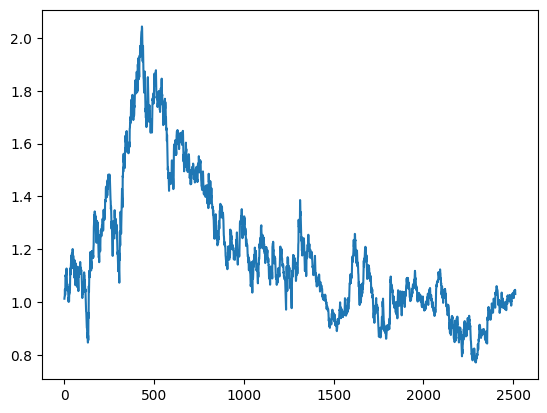

In [326]:
cumulative_returns=0.999+returns
for i in range(1,len(cumulative_returns)):
    cumulative_returns[i]*=cumulative_returns[i-1]
sns.lineplot(cumulative_returns)